## Introduction
**Author: Dikshant Dulal** 

This tutorial will guide you through the process of simulating the ground state energy of the simple molecule $H_2$. Initially, I will provide an explanation of the UCCSD ansatz and demonstrate how to construct it using the language of second quantization and subsequently converting it into the language of Pauli operators. Subsequently, I will demonstrate the utilization of the UCCSD ansatz for simulating the ground state energy of the $H_2$ molecule.

Within this section, our discussion on the UCCSD ansatz is based on the paper by [Barkoutsos et al. (2018)](https://arxiv.org/abs/1805.04340). The UCCSD ansatz involves a unitary operator with adjustable parameters denoted as $\boldsymbol{\theta}$. This operator comprises two components: one responsible for generating single excitations (transferring one electron from an occupied orbital to an unoccupied orbital) and another for generating double excitations (transferring two electrons from occupied orbitals to unoccupied orbitals).
The wavefunction can be written as 
$$ |\Psi \rangle = U(\theta) |HF \rangle$$
where $|HF\rangle$ is the reference state (for example the Hartree-Fock solution). See this more for [reference](https://arxiv.org/pdf/1701.02691.pdf). The unitary operator $U(\theta)$ is given by
$$U(\boldsymbol{\theta}) = e^{\hat{T}(\boldsymbol{\theta}) - \hat{T}^\dagger(\boldsymbol{\theta})}$$

Here, 

$$\hat{T}(\boldsymbol{\theta})  = \hat{T}_1(\boldsymbol{\theta}) + \hat{T}_2(\boldsymbol{\theta}) + \ldots + \hat{T}_n(\boldsymbol{\theta})$$ 

is the excitation operator up to the $n^\text{th}$ order where $\hat{T}_k(\boldsymbol{\theta)}$ excites $k$ number of electrons from occupied orbital to unoccupied orbital. The single and double excitations are given by 

$$
\begin{aligned}
    \hat{T}_1(\boldsymbol{\theta)} &=   \sum_{k;i}
                                        \theta_k^i
                                        \hat{c}_i^\dagger \hat{c}_k \\
%
    \hat{T}_2(\boldsymbol{\theta)} &=   \sum_{k,l;i,j}
                                        \theta_{k,l}^{i,j}
                                        \hat{c}_i^\dagger \hat{c}_j^\dagger \hat{c}_k \hat{c}_l             
\end{aligned}
$$

and $\boldsymbol{\theta} = \{ \{\theta_k^i\},  \{ \theta_{k,l}^{i,j} \}, \ldots\}$ are coefficients for all excitations. Up to the double excitation the unitary ansatz becomes 
\begin{align*}
     U(\boldsymbol{\theta}) &= \mathrm{exp} 
            \Big\{\hat{T_1}(\boldsymbol{\theta}) - 
                  \hat{T_1}^\dagger(\boldsymbol{\theta}) 
            +     
            \hat{T_2}(\boldsymbol{\theta}) - 
                \hat{T_2}^\dagger(\boldsymbol{\theta})
            \Big\} \\ 
     &= \mathrm{exp} 
            \Big\{\sum_{ki}
                            \theta_{ki}
                            (\hat{c}_i^\dagger \hat{c}_k - \hat{c}_k^\dagger \hat{c}_i) 
                + \sum_{klij}
                            \theta_{klij}
                            (\hat{c}_i^\dagger \hat{c}_j^\dagger \hat{c}_k \hat{c}_l
                            - \hat{c}_l^\dagger \hat{c}_k^\dagger \hat{c}_j\hat{c}_i)
            \Big\}
\end{align*}
Since implementation of exponentiatial of hamiltonian with non-commuting terms on a quantum computer is not possible, we will have to use the trotterization decomposition.
Using the trotter approximation up to the first order
$e^{\hat{A}+\hat{B}} \approx e^{\hat{A}} e^{\hat{B}}$ [see proof here](https://en.wikipedia.org/wiki/Baker%E2%80%93Campbell%E2%80%93Hausdorff_formula) where $\hat{A} = 
        \hat{T}_1(\boldsymbol{\theta}) - 
        \hat{T}_1^\dagger(\boldsymbol{\theta})$ 
and  $\hat{B} = 
        \hat{T}_2(\boldsymbol{\theta}) - 
        \hat{T}_2^\dagger(\boldsymbol{\theta}).$

\begin{align*}
     U(\boldsymbol{\theta}) &= 
            \mathrm{exp} 
            \Big\{\sum_{ki}
                            \theta_{ki}
                            (\hat{c}_i^\dagger \hat{c}_k - \hat{c}_k^\dagger \hat{c}_i) 
            \Big\} \text{ }
            \mathrm{exp} 
            %
            \Big\{
            \sum_{klij}
                            \theta_{klij}
                            (\hat{c}_i^\dagger \hat{c}_j^\dagger \hat{c}_k \hat{c}_l
                            - \hat{c}_l^\dagger \hat{c}_k^\dagger \hat{c}_j\hat{c}_i)
            \Big\}
\end{align*}


Using the first-trotterization decomposition again  we can write

$$
\hat{U}(\boldsymbol{\theta}) =
        \prod_{i > k} \mathrm{exp} 
        \Big\{\theta_{ki}
        (\hat{c}_i^\dagger \hat{c}_k-\mathrm{c.t.}) \Big\}
        \prod_{i > j > k > l} \mathrm{exp} 
        \Big\{\theta_{klij}
        (\hat{c}_i^\dagger \hat{c}_j^\dagger \hat{c}_k \hat{c}_l-\mathrm{c.t.}) 
        \Big\}
$$

The initial component consists of a series of exponential terms involving operators such as $\hat{c}_i^\dagger \hat{c}_k$ and its conjugate transpose. Here, $\hat{c}$ and $\hat{c}^\dagger$ represent the fermionic annihilation and creation operators, while $i$ and $k$ are indices corresponding to unoccupied and occupied orbitals, respectively. The subsequent component follows a similar structure but involves operators like $\hat{c}_i^\dagger \hat{c}_j^\dagger \hat{c}_k \hat{c}_l$ and its Hermitian conjugate. In this case, $i$ and $j$ represent indices for unoccupied orbitals, while $k$ and $l$ represent indices for occupied orbitals. The parameters to be optimized are $\theta_{ik}$ and $\theta_{ijkl}$, which correspond to the coupled-cluster amplitudes for each single and double excitation operation, respectively.

Our objective is to convert the fermionic creation and annihilation operators into Pauli operators, which can be implemented on a quantum computer. For this purpose, we can employ a mapping known as the Jordan-Wigner transformation.

$$
\begin{aligned} 
    \hat{a}_j &= 
        1^{\otimes j} \otimes \frac{1}{2}(\hat{X} + i\hat{Y}) \otimes \hat{Z}^{\otimes N-j-1} 
        \\
    \hat{a}^\dagger_j &= 1^{\otimes j} \otimes \frac{1}{2}(\hat{X} - i\hat{Y}) \otimes \hat{Z}^{\otimes N-j-1}
    % \label{eq:JordanWigner}
\end{aligned} 
$$

where $X_j$, $Y_j$, and $Z_j$ are Pauli matrices acting on qubit $j$. Subsituting the Jordan-Wigner transformation into the coupled-cluster ansatz, we obtain
$$
\begin{aligned}
    \hat{U}(\boldsymbol{\theta}) &= \prod_{i > k} \mathrm{exp} \Big\{ \frac{i\theta_{ki}}{2}
        \bigotimes_{a=k+1}^{i-1} \hat{Z}_a (\hat{Y}_k \hat{X}_i - \mathrm{c.t.}) \Big\} \\  
        & \prod_{i > j > k > l} \mathrm{exp} \Big\{ \frac{i\theta_{klij}}{8}
        \bigotimes_{b=l+1}^{k-1} \hat{Z}_b \bigotimes_{a=j+1}^{i-1}
        \hat{Z}_a (\hat{X}_l \hat{X}_k \hat{Y}_j \hat{X}_i + 
        \hat{Y}_l \hat{X}_k \hat{Y}_j \hat{Y}_i +
        \hat{X}_l \hat{Y}_k \hat{Y}_j \hat{Y}_i +
        \hat{X}_l \hat{X}_k \hat{X}_j \hat{Y}_i -
        \{\mathrm{c.t.}\}) \Big\}.
\end{aligned}
$$



### Construction of the Hamiltonian of $H_2$ molecule
First we need access to the 1D array of nuclear coordinates of the molecule in atomic units. Molecular orbitals are typically represented as a linear combination of atomic orbitals. The expansion coefficients in the atomic basis are calculated using the Hartree-Fock (HF) method. In the HF approximation, each electron in the molecule is treated as an independent particle that moves under the influence of the Coulomb potential due to the nuclei, and a mean field generated by all other electrons 3. The optimized coefficients are precisely what we need to build the second-quantized Hamiltonian then we pass that information to our Jordan-Wigner transformation function to obtain the qubit Hamiltonian.

For this example, we use a [minimal basis
set](https://en.wikipedia.org/wiki/STO-nG_basis_sets) to represent the
[molecular orbitals](https://en.wikipedia.org/wiki/Molecular_orbital).

In [1]:
# uncomment and run this
# ! pip install pennylane

In [2]:
from pennylane import numpy as np
import pennylane as qml

# MOLECULAR PARAMETERS
SYMBOLS = ["H", "H"]
COORDINATES = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614])

# MOLECULAR HAMILTONIAN
HAMILTONIAN, QUBITS = qml.qchem.molecular_hamiltonian(SYMBOLS, COORDINATES, basis='sto-3g')

#PENNYLANE DEVICE
DEVICE = qml.device("default.qubit", wires=QUBITS)
# DEVICE = qml.device("braket.local.qubit", wires=qubits)

In [3]:
#read the moleculear hamiltonian from the nuclear coordinates.
print("Number of qubits = ", QUBITS)
print("The Hamiltonian is ", HAMILTONIAN)
print("Number of terms in the Hamiltonian = ", len(HAMILTONIAN.ops))

Number of qubits =  4
The Hamiltonian is    (-0.2427450126094144) [Z2]
+ (-0.2427450126094144) [Z3]
+ (-0.042072551947439224) [I0]
+ (0.1777135822909176) [Z0]
+ (0.1777135822909176) [Z1]
+ (0.12293330449299361) [Z0 Z2]
+ (0.12293330449299361) [Z1 Z3]
+ (0.16768338855601356) [Z0 Z3]
+ (0.16768338855601356) [Z1 Z2]
+ (0.17059759276836803) [Z0 Z1]
+ (0.1762766139418181) [Z2 Z3]
+ (-0.044750084063019925) [Y0 Y1 X2 X3]
+ (-0.044750084063019925) [X0 X1 Y2 Y3]
+ (0.044750084063019925) [Y0 X1 X2 Y3]
+ (0.044750084063019925) [X0 Y1 Y2 X3]
Number of terms in the Hamiltonian =  15


### Preparation of the circuit: 

### Bonus: Useful links
- [pennylane aws-braket example](https://pennylane.ai/blog/2022/12/computing-adjoint-gradients-with-amazon-braket-sv1/
)
- [Adjoint gradient computation with braket](https://github.com/amazon-braket/amazon-braket-examples/blob/main/examples/pennylane/6_Adjoint_gradient_computation/6_Adjoint_gradient_computation.ipynb)

First, we must establish the quantum arrangement that readies the experimental condition of the molecule. Our goal is to create states in the following manner:

$$| \Psi(\theta) \rangle = \cos(\theta/2)~|1100\rangle -\sin(\theta/2)~|0011\rangle,$$
Note that we prepare our wavefunction as above since our wavefunction can be written as sum of two states $|\psi\rangle = \cos(\frac{\theta}{2})|\tilde{0}\rangle + \sin(\frac{\theta}{2})e^{i\phi}|\tilde{1}\rangle$ where each value of $\theta$ and $\phi$ corresponds to a unique state in the bloch sphere where $0 \leq \phi < 2\pi$, $0 \leq \theta \leq \pi$.

Here $\theta$ symbolizes the adjustable parameter that we will optimize to obtain the most accurate approximation of the actual ground state. Within the Jordan-Wigner encoding framework, the initial term $|1100\rangle$ represents the [Hartree-Fock (HF) state](https://en.wikipedia.org/wiki/Hartree%E2%80%93Fock_method), in which the two electrons in the molecule occupy the orbitals with the lowest energy. The second term $|0011\rangle$ encodes a double excitation of the HF state, where the two particles are excited from qubits 0 and 1 to qubits 2 and 3.

The gate G^(2) corresponds to the Givens rotation, refer more about it here on [DoubleExcitation](https://docs.pennylane.ai/en/stable/_modules/pennylane/ops/qubit/qchem_ops.html#DoubleExcitation). This operation is specifically used to couple the states |1100⟩ and |0011⟩ of the four-qubit system. Implementing the circuit above using PennyLane is straightforward.
First, we use the `hf_state` function to
generate the vector representing the Hartree-Fock state, the information of which is passed to the `BasisState` function.

In [4]:
ELECTRONS = 2
HF = qml.qchem.hf_state(ELECTRONS, QUBITS)
print(HF)

[1 1 0 0]


In [5]:
# define the circuit
def circuit(params, wires):
    qml.BasisState(HF, wires=wires)
    qml.DoubleExcitation(params[0], wires=wires)

# then we define the objective energy to be minimized
@qml.qnode(DEVICE, interface="autograd")
def objective(parameter):
    circuit(parameter, wires=range(QUBITS))
    return qml.expval(HAMILTONIAN)

In [6]:
# store the values of the cost function
OPTIMIZER = qml.GradientDescentOptimizer(stepsize=0.4)

theta = np.array([0.0], requires_grad=True)

energy = [objective(theta)]

# store the values of the circuit parameter
angle = [theta]

MAX_ITERATIONS = 5
CONV_TOL = 1e-06

for n in range(MAX_ITERATIONS):
    theta, prev_energy = OPTIMIZER.step_and_cost(objective, theta)

    energy.append(objective(theta))
    angle.append(theta)

    conv = np.abs(energy[-1] - prev_energy)

    if n % 2 == 0:
        print(f"Step = {n},  Energy = {energy[-1]:.8f} Ha")

    if conv <= CONV_TOL:
        break

print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")
print("\n" f"Optimal value of the circuit parameter = {angle[-1][0]:.4f}")

Step = 0,  Energy = -1.12799983 Ha
Step = 2,  Energy = -1.13466246 Ha
Step = 4,  Energy = -1.13590595 Ha

Final value of the ground-state energy = -1.13590595 Ha

Optimal value of the circuit parameter = 0.1841


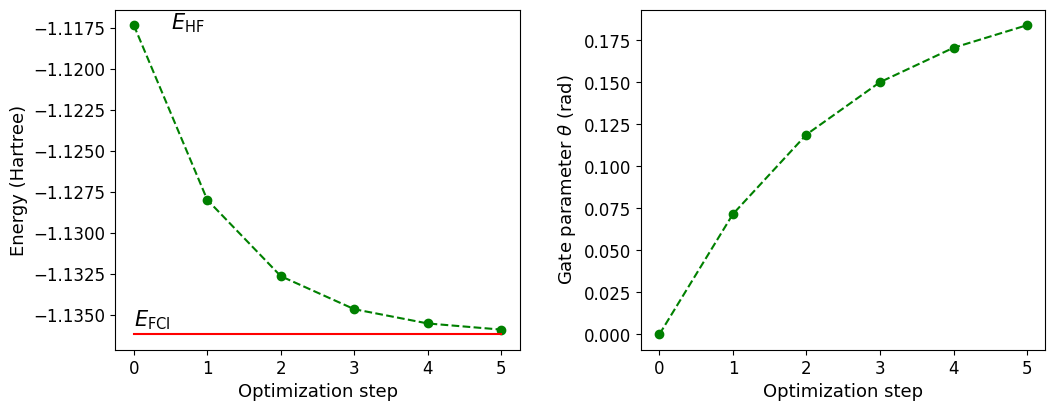

In [7]:
#visualization of the outcome. 
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Full configuration interaction (FCI) energy computed classically
E_fci = -1.136189454088

# Add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.plot(range(n + 2), np.full(n + 2, E_fci), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy (Hartree)", fontsize=13)
ax1.text(0.5, -1.1176, r"$E_\mathrm{HF}$", fontsize=15)
ax1.text(0, -1.1357, r"$E_\mathrm{FCI}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add angle plot on column 2
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 2), angle, "go", ls="dashed")
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3, bottom=0.2)
plt.show()

In this particular scenario, the VQE algorithm demonstrates convergence after thirteen iterations. The optimal value of the circuit parameter, 𝜃* = 0.208, defines the state:

|Ψ(𝜃*)⟩ = 0.994|1100⟩ - 0.104|0011⟩

This state corresponds precisely to the ground state of the H2 molecule within the minimal basis set approximation.

Conclusion
----------

Throughout this tutorial, we successfully implemented the VQE algorithm to determine the ground state of a hydrogen molecule. By employing a straightforward circuit, we were able to prepare quantum states of the molecule beyond the Hartree-Fock approximation. The ground-state energy was obtained by minimizing a cost function defined as the expectation value of the molecular Hamiltonian in the trial state.

Refer to the tutorials on [molecular geometry optimization](https://pennylane.ai/qml/demos/tutorial_mol_geo_opt.html) and [VQE in different spin sectors](https://pennylane.ai/qml/demos/tutorial_vqe_spin_sectors.html) to get an idea of how VQE can be useful for molecular simulation.

### Running hybrid jobs


In [8]:
from braket.tracking import Tracker
from braket.aws import AwsDevice
from braket.devices import Devices
from braket.jobs import hybrid_job
from braket.jobs.metrics import log_metric


# BRAKET DEVICE
DEVICE_ARN = Devices.Amazon.SV1
AWS_DEVICE = AwsDevice(DEVICE_ARN)

# BRAKET HYBRID JOB
@hybrid_job(device=DEVICE_ARN)
def hybrid_job_qchem(steps_count=MAX_ITERATIONS):
    braket_cost_tracker = Tracker().start()

    # INITIALIZATION
    QML_DEVICE = qml.device("braket.aws.qubit", device_arn=DEVICE_ARN.value, wires=QUBITS)
    INITIAL_PARAMETERS = np.array([0.0])

    # CIRCUIT
    @qml.qnode(QML_DEVICE)
    def circuit(parameters):
        qml.BasisState(HF, wires=range(QUBITS))
        qml.DoubleExcitation(parameters[0], wires=range(QUBITS))
        return qml.expval(HAMILTONIAN)

    # OPTIMIZATION
    costs = []
    parameters = INITIAL_PARAMETERS

    for step in range(steps_count):
        parameters, cost = OPTIMIZER.step_and_cost(circuit, parameters)
        costs.append(cost)

        # BRAKET TASK COST
        braket_task_cost = float(braket_cost_tracker.qpu_tasks_cost() + braket_cost_tracker.simulator_tasks_cost())

        # LOG OPTIMIZATION COST
        log_metric(metric_name="optimization_cost", value=cost, iteration_number=step)

        # LOG BRAKET COST
        log_metric(metric_name="braket_cost", value=braket_task_cost, iteration_number=step)

    results = {"parameters": parameters, "costs": costs, "braket_tasks_cost(USD)": braket_task_cost}

    return results


In [9]:
# RUN THE HYBRID JOB
job = hybrid_job_qchem(steps_count=MAX_ITERATIONS)


In [10]:
job.state()

'QUEUED'

In [11]:
if job.state() == 'COMPLETED':
    print(job.result())